In [1]:
# import sys
# sys.path.append("../../common")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from nilm_dao import get_vndale2_data
font = {'size': 18}
plt.rc('font', **font)
from utils import count_labels

In [3]:
df = pd.read_csv("/home/mrcong/Code/mylab-nilm-files/nilm-physical-features/results/models/VNDALE1/window_1800/5_comb/model_evaluation/tuning_progress.csv")
df["diff"] = df["train_acc"] - df["val_acc"]
df.head()

,n_estimators,max_depth,val_f1,train_f1,val_acc,train_acc,diff
0,5,15,0.853555,0.854064,0.852745,0.852995,0.000250
1,5,16,0.861331,0.868613,0.862033,0.869139,0.007107
2,5,17,0.892932,0.910909,0.893332,0.911189,0.017858
3,5,18,0.906344,0.933906,0.906392,0.933945,0.027553
4,5,19,0.912912,0.942101,0.912876,0.942146,0.029270


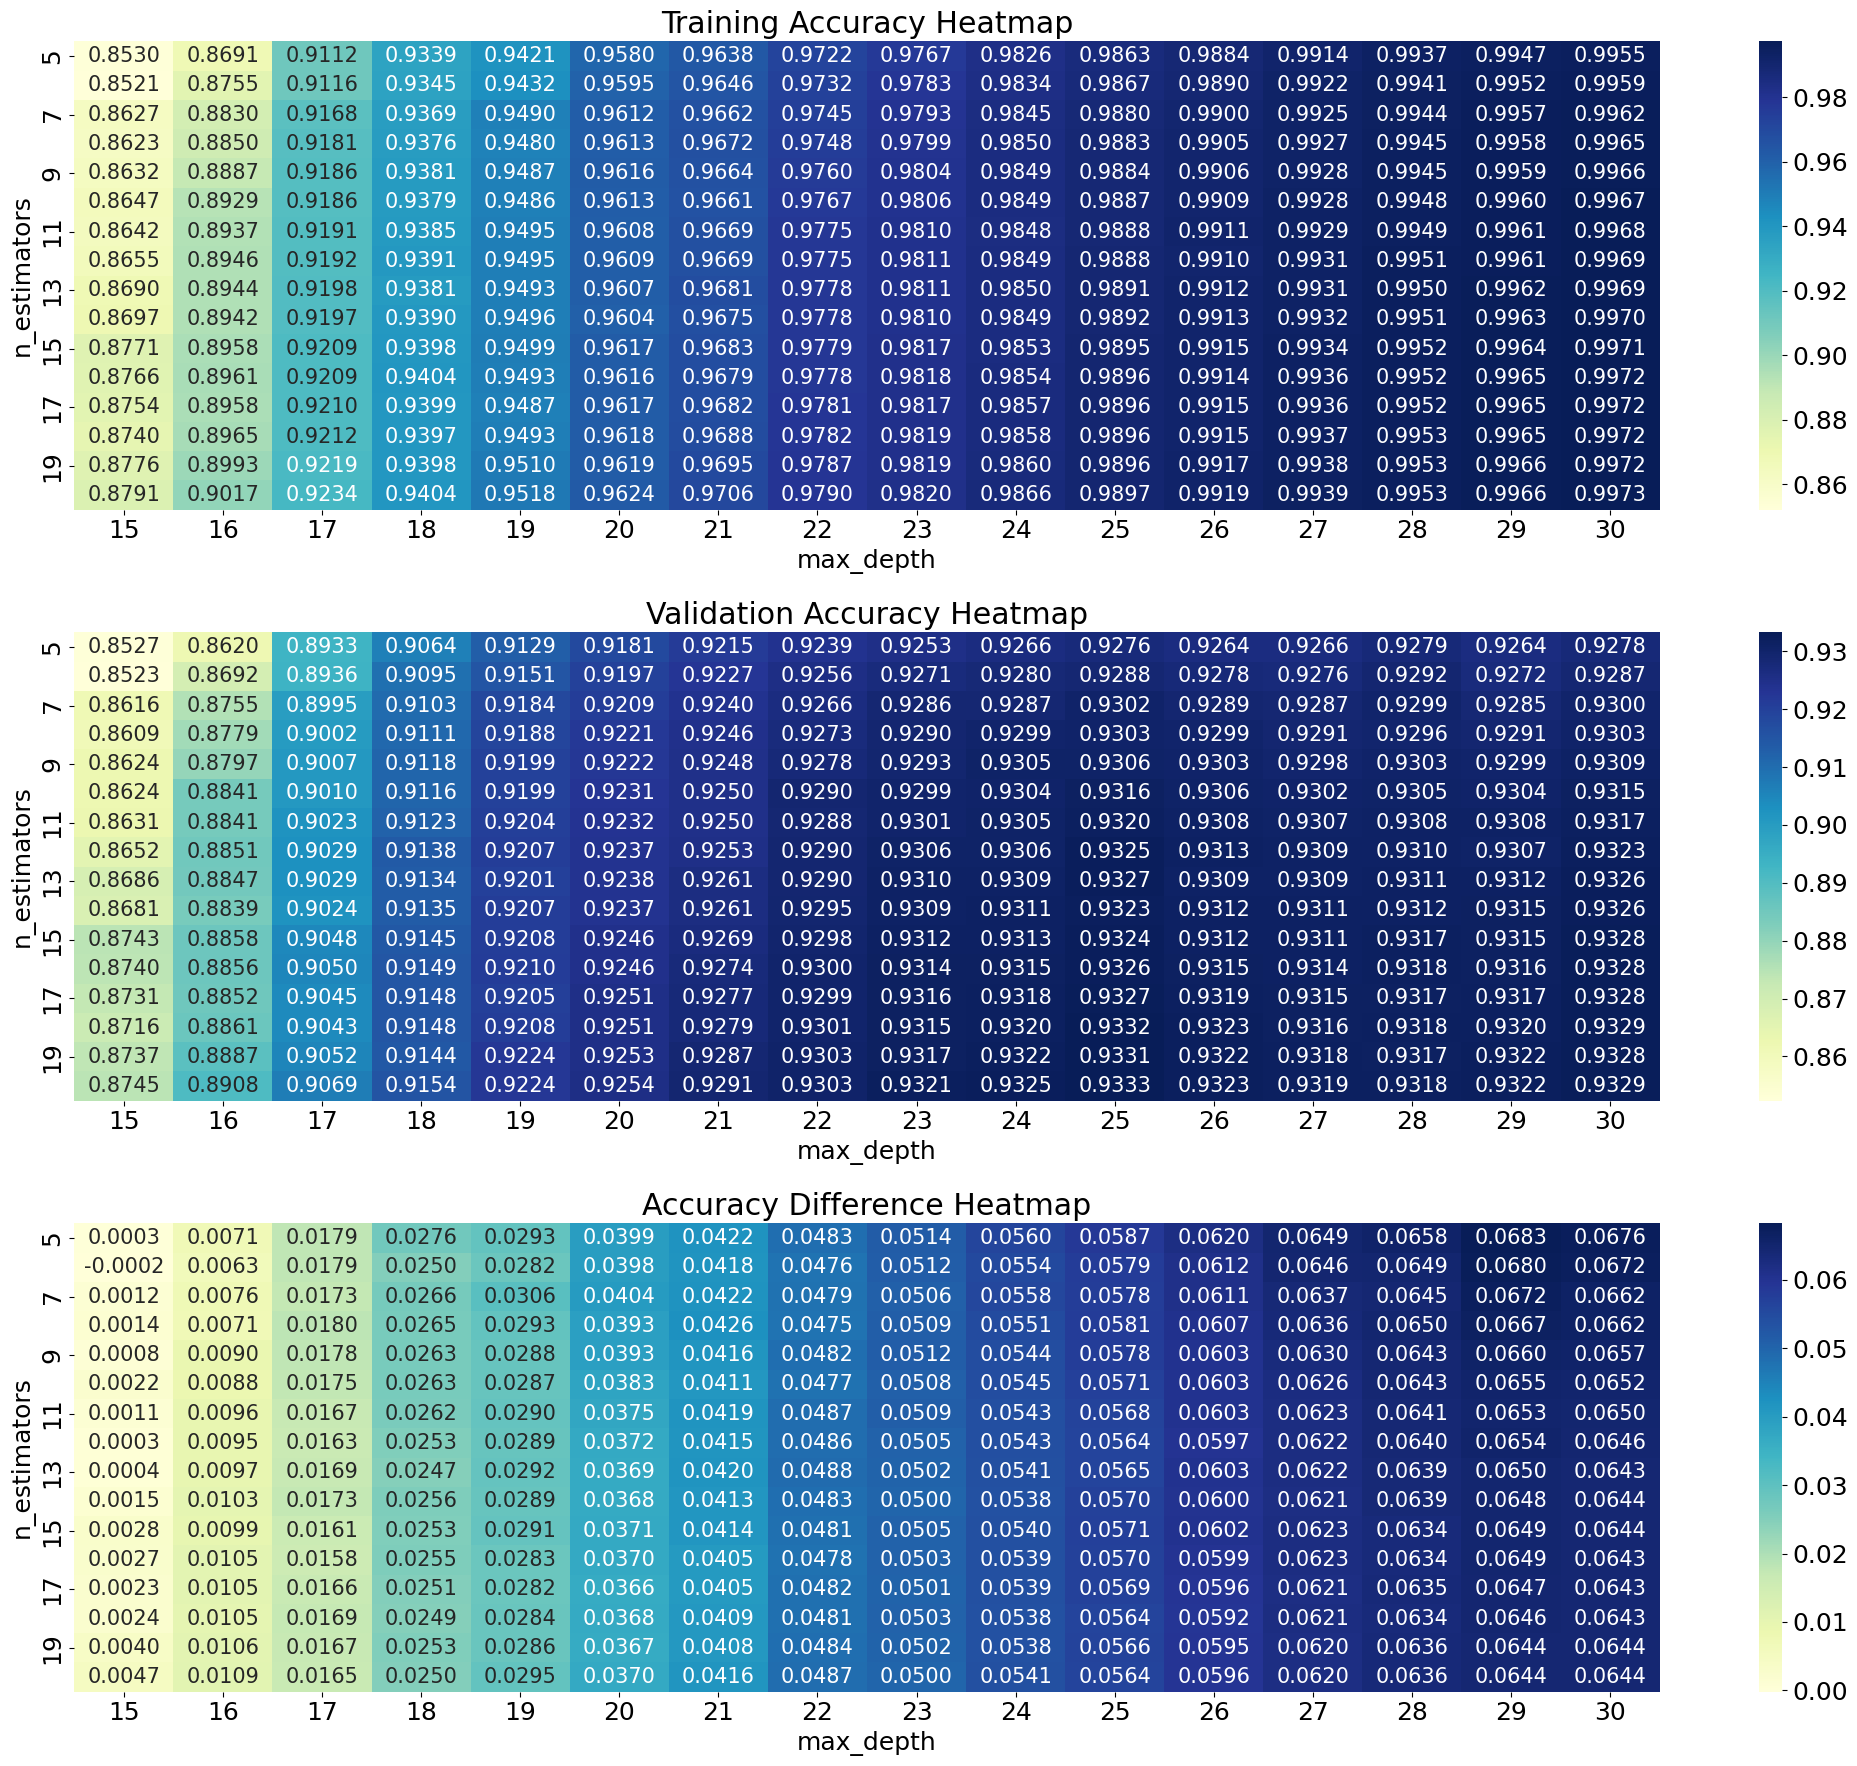

In [4]:
# Pivot the DataFrame for heatmap
pivot_train = df.pivot(index="n_estimators", columns="max_depth", values="train_acc")
pivot_val = df.pivot(index="n_estimators", columns="max_depth", values="val_acc")
pivot_diff = df.pivot(index="n_estimators", columns="max_depth", values="diff")

# Plot heatmaps
plt.figure(figsize=(21, 18))
font_size = 15

plt.subplot(3, 1, 1)
sns.heatmap(pivot_train, annot=True, cmap="YlGnBu", cbar=True, fmt=".4f", annot_kws={"size": font_size})
plt.title('Training Accuracy Heatmap')

plt.subplot(3, 1, 2)
sns.heatmap(pivot_val, annot=True, cmap="YlGnBu", cbar=True, fmt=".4f", annot_kws={"size": font_size})
plt.title('Validation Accuracy Heatmap')

plt.subplot(3, 1, 3)
sns.heatmap(pivot_diff, annot=True, cmap="YlGnBu", cbar=True, fmt=".4f", annot_kws={"size": font_size})
plt.title('Accuracy Difference Heatmap')

plt.tight_layout()
plt.show()